In [1]:
import os 
import numpy as np
from utils.data_utils import load_obj, SAVE_DIR, UD_PARENT, RESULTS_DIR, LEX_PATH_SET, save_obj
from utils import extract_pool
from utils.optim_utils import optim_pool
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn
from tqdm import tqdm 

/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


Loading lookup from /Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/brainio_collection/lookup.csv


/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/brainio_base/assemblies.py:224: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  xr_data.set_index(append=True, inplace=True, **coords_d)


In [7]:
extract_id=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False'
]

Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']

#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
#'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',

control=['group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
'group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False'
]
optim_id=['coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1']

In [8]:
#extract_id=['group=set_3-dataset=ud_sentences_filter_v2-brain_resp-bench=Fedorenko2016v3-encoding-weights_v2-ave=False',
#           'group=set_3-dataset=ud_sentences_filter_v2-network_act-bench=None-ave=False']
optim_id=['coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1']

In [9]:
optim_files=[]
optim_results=[]
for ext in control:
    for optim in optim_id:
        optim_file=os.path.join(RESULTS_DIR,f"results_{ext}_{optim}.pkl")
        optim_files.append(optim_file)
        optim_results.append(load_obj(optim_file))

loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=second_best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl


/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


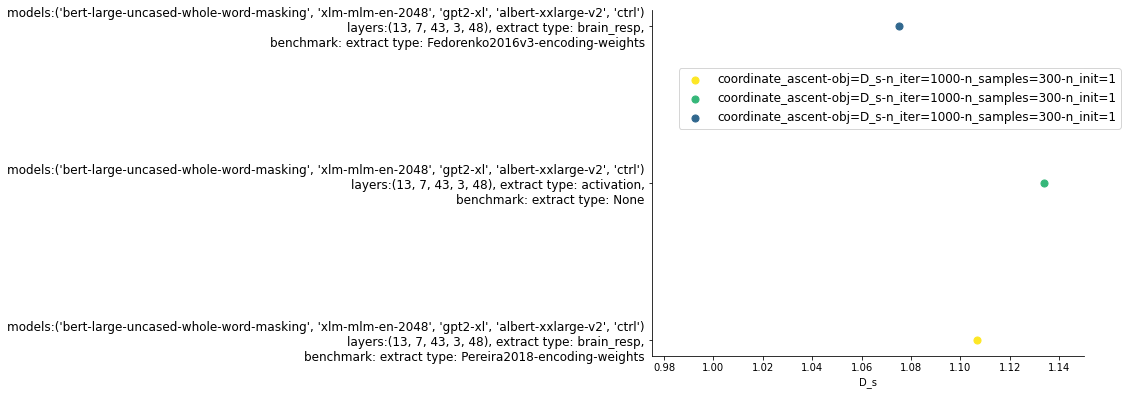

In [15]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_results)),len(optim_results)))
tick_l=[]
tick=[]
for idx, res in enumerate(optim_results):
    ax.scatter(res['optimized_d'],idx,s=50,c=alph_col[[idx],:],label=res['optimizatin_name'])
    ext_obj=extract_pool[res['extractor_name']]()
    tick_l.append(f"models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec}, extract type: {ext_obj.extract_type},\nbenchmark: extract type: {ext_obj.extract_benchmark}")
    tick.append(idx)

    
ax.set_xlabel('D_s')
ax.set_yticklabels(tick_l,fontsize=12)
ax.set_yticks(tick)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((.975,1.15))
ax.legend(bbox_to_anchor=(1.1, .85), frameon=True,fontsize=12)
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

In [25]:
xy_val=[[len(set(x['optimized_S']).intersection(set(y['optimized_S']))) for y in optim_results] for x in optim_results ]
x_cord=[[(idx,f"{x['benchmark']}\n{x['data_type']}\n") for y in optim_results] for idx, x in enumerate(optim_results) ]
y_cord=[[(idy,f"{x['data_type']}\n{x['optimizatin_name']}") for idy,y in enumerate(optim_results)] for x in optim_results ]
x_cord1=[x[0] for x in x_cord]
y_cord1=y_cord[0]

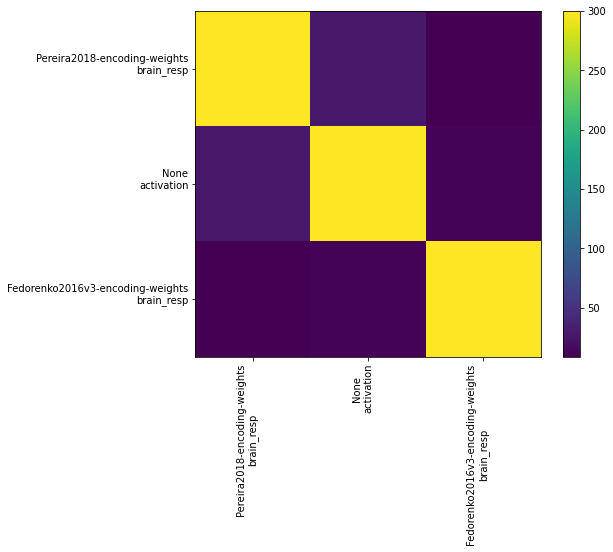

In [26]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])
cmap=cm.get_cmap('viridis_r')
tick_l=[]
tick=[]
im=ax.imshow(np.stack(xy_val))
ytick=[y[0] for y in y_cord1]
yticklabel=[y[1] for y in y_cord1]

xtick=[x[0] for x in x_cord1]
xticklabel=[x[1] for x in x_cord1]

ax.set_xticks(xtick)
ax.set_xticklabels(xticklabel,rotation = 90)

ax.set_yticks(xtick)
ax.set_yticklabels(xticklabel,rotation = 0)
fig.colorbar(im , orientation='vertical')


In [27]:
lex_names=[x['name'] for x in LEX_PATH_SET]
sample_values=[]
for idx, res in enumerate(optim_results):
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    lex_values=[[np.nanmean(sent_dat[lex_name]) for lex_name in lex_names] for sent_dat in ext_obj.data_]
    values=[lex_values[id] for id in res['optimized_S']]
    sample_values.append(np.stack(values))

loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 234579.01it/s]
901it [00:00, 208719.09it/s]
901it [00:00, 211440.04it/s]
901it [00:00, 218317.04it/s]
901it [00:00, 216528.27it/s]
901it [00:00, 211985.63it/s]
901it [00:00, 206123.48it/s]
901it [00:00, 207561.26it/s]
902it [00:00, 213538.53it/s]
/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 189922.00it/s]
901it [00:00, 183023.44it/s]
901it [00:00, 215172.12it/s]
901it [00:00, 189521.96it/s]
901it [00:00, 184822.61it/s]
901it [00:00, 184705.18it/s]
901it [00:00, 183351.99it/s]
901it [00:00, 186583.78it/s]
902it [00:00, 171025.82it/s]


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 192603.23it/s]
901it [00:00, 185275.67it/s]
901it [00:00, 184443.75it/s]
901it [00:00, 182687.22it/s]
901it [00:00, 189483.95it/s]
901it [00:00, 187593.34it/s]
901it [00:00, 176939.22it/s]
901it [00:00, 189598.03it/s]
902it [00:00, 182519.40it/s]


In [ ]:
benchmark

/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/eghbalhosseini/anaconda3/envs/neural-nlp-master/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a fu

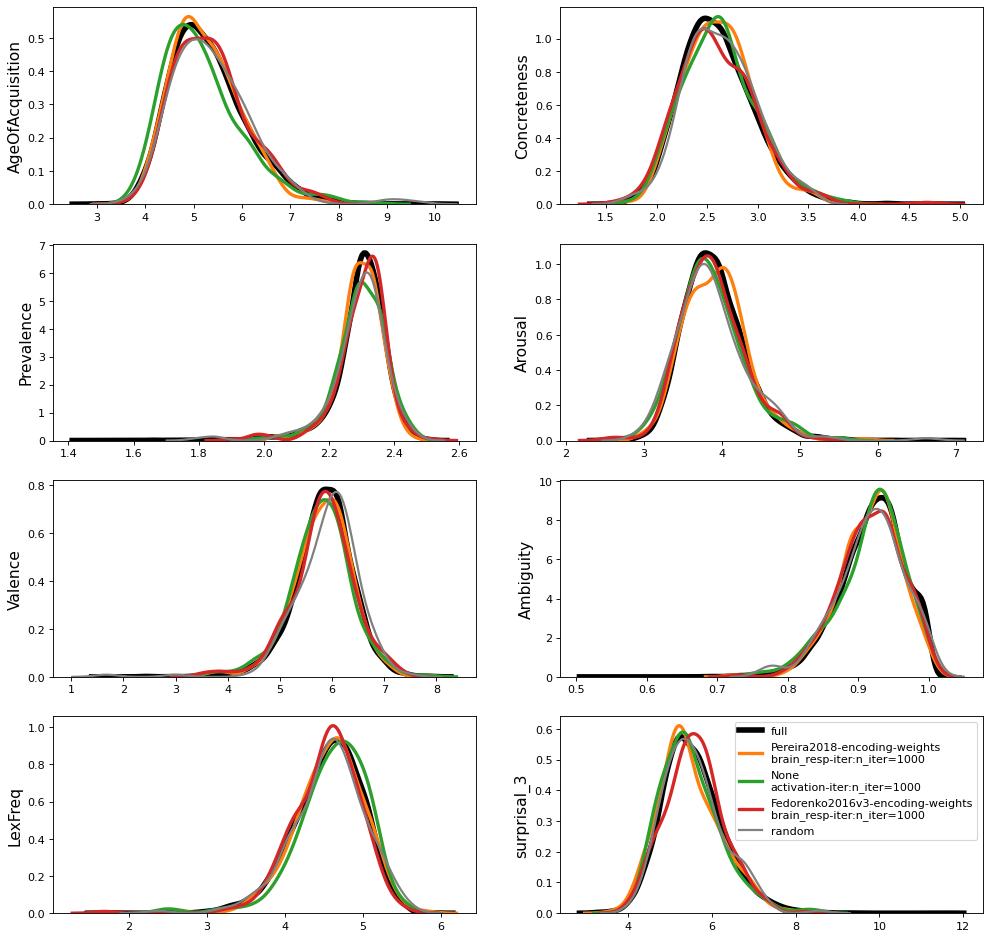

In [33]:
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
for i in range(1, len(lex_names)+1):
    plt.subplot(4, 2, i)
    
    seaborn.distplot(np.stack(lex_values)[:,i-1],bins=50,label='full',norm_hist=True,hist=False,kde_kws={"lw": 5,"color":'k'})
    for idx,val in enumerate(sample_values):
        optim_spec=optim_results[idx]['optimizatin_name'].split('-')
        name=f"{optim_results[idx]['benchmark']}\n{optim_results[idx]['data_type']}-iter:{optim_spec[2]}"
        seaborn.distplot(val[:,i-1],bins=50,label=name,norm_hist=True,hist=False,kde_kws={"lw": 3})   
    #seaborn.distplot(select_s_feat_mean_new[i-1],bins=50,label='sample',norm_hist=True)
    #ax=plt.gca()
    #ax.set_xticks(np.linspace(s_with_all_feat[i-1].min(),s_with_all_feat[i-1].max(),num=10))
    random_set=np.random.randint(0,np.stack(lex_values).shape[0],200)
    seaborn.distplot(np.stack(lex_values)[random_set,i-1],bins=50,label='random',norm_hist=True,hist=False,kde_kws={"lw": 2,"color": (.5,.5,.5)})
    if i==len(lex_names):
        plt.legend(loc='upper right')
    plt.ylabel(lex_names[i-1],fontsize=14);


# compute the predicted brain based on neural activation list

In [9]:
benmarks=[x['benchmark'] for x in optim_results]
data_type=[x['data_type'] for x in optim_results]

In [ ]:
extract_id=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False'
]

Pereira_control=['group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp1-bench=Pereira2018-encoding-weights-ave=False',
                'group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp_Pereira_exp2-bench=Pereira2018-encoding-weights-ave=False']


In [34]:
ds_transform=[dict(src='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
                  trg='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
              dict(trg='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
                  src='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-activation-bench=None-ave=False',
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
              
             dict(src='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
                  trg='group=set_3-dataset=ud_sentences_filter_v2-network_act-bench=None-ave=False',
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
            dict(trg='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
                src='group=set_3-dataset=ud_sentences_filter_v2-network_act-bench=None-ave=False',
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),

              
             dict(src='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
                  trg='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1'),
            dict(trg='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False',
                  src='group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False',
                  optim='coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1')]


In [36]:
pairs=[]
for ds_t in ds_transform:
        optim_file=os.path.join(RESULTS_DIR,f"results_{ds_t['src']}_{ds_t['optim']}.pkl")
        res=load_obj(optim_file)
        ext_obj=extract_pool[res['extractor_name']]()
        ext_obj.load_dataset()
        #ext_obj()
        optimizer_obj = optim_pool[ds_t['optim']]()
        optimizer_obj.load_extractor(ext_obj)
        ds_src=optimizer_obj.mod_objective_function(res['optimized_S'])
        # 
        trg_obj=extract_pool[ds_t['trg']]()
        trg_obj.load_dataset()
        #trg_obj()
        trg_opt_obj = optim_pool[ds_t['optim']]()
        trg_opt_obj.load_extractor(trg_obj)
        ds_trg=trg_opt_obj.mod_objective_function(res['optimized_S'])
        # get the random set 
        ds_trg_rnd=[]
        ds_scr_rnd=[]
        for k in tqdm(enumerate(range(200))):
            sent_random=list(np.random.choice(trg_opt_obj.N_S,trg_opt_obj.N_s))
            ds_trg_rnd.append(trg_opt_obj.mod_objective_function(sent_random))
            ds_scr_rnd.append(optimizer_obj.mod_objective_function(sent_random))
        pairs.append([[ds_src,ds_trg],[ds_scr_rnd,ds_trg_rnd]])

loading /Users/eghbalhosseini/MyData/sent_sampling/results/results_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Pereira2018-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.pkl
loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 162170.88it/s]
901it [00:00, 185275.67it/s]
901it [00:00, 190621.33it/s]
901it [00:00, 188821.22it/s]
901it [00:00, 180566.10it/s]
901it [00:00, 184254.90it/s]
901it [00:00, 181363.34it/s]
901it [00:00, 174512.49it/s]
902it [00:00, 176458.13it/s]


AttributeError: 'extractor' object has no attribute 'model_group_act'

In [49]:
pairs[0][0]

[1.28713829534376, 1.0023401304678814]

In [ ]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_results)),len(optim_results)))
tick_l=[]
tick=[]

ax.scatter(pairs[0][0][0],pairs[0][0][1],s=30,c=(1,0,0),label='optimization based on \nnetwork activation')
ax.scatter(pairs[0][1][0],pairs[0][1][1],s=10,c=(1,.5,.5))


ax.scatter(pairs[1][0][1],pairs[1][0][0],s=30,c=(0,0,1),label='optimization based on \nbrain prediction')
ax.scatter(pairs[1][1][1],pairs[1][1][0],s=10,c=(.5,.5,1))

    
ax.set_xlabel('D_s\n network activation')
ax.set_ylabel('D_s\n brain prediction')

ax.set_xlim(.6,1.4)
ax.set_ylim(.8,1.4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(bbox_to_anchor=(1.1, .85), frameon=True)
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

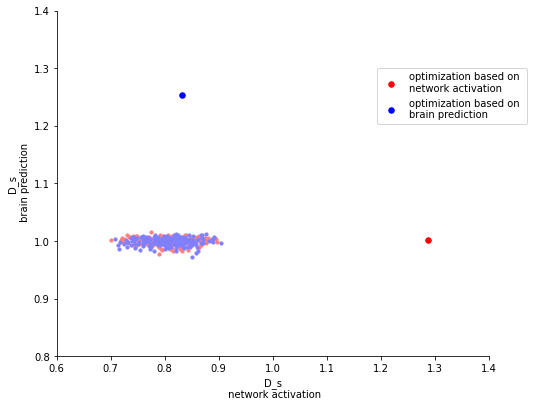

In [57]:
# Example sentences : 

0.9989342804843963

# Example sentences : 

In [37]:
select_sent=[]
for idx, res in enumerate(optim_results):
    ext_obj=extract_pool[res['extractor_name']]()
    ext_obj.load_dataset()
    values=[ext_obj.data_[id]['text'] for id in res['optimized_S']]
    with open(os.path.join(RESULTS_DIR,f"sentences_{res['extractor_name']}_{res['optimizatin_name']}.txt"), 'w') as f:
        for item in values:
            f.write("%s\n" % item)


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 208511.80it/s]
901it [00:00, 186546.94it/s]
901it [00:00, 204772.03it/s]
901it [00:00, 205574.06it/s]
901it [00:00, 210662.13it/s]
901it [00:00, 200364.13it/s]
901it [00:00, 209633.77it/s]
901it [00:00, 201614.80it/s]
902it [00:00, 210356.53it/s]


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 186041.84it/s]
901it [00:00, 187119.62it/s]
901it [00:00, 212749.42it/s]
901it [00:00, 199866.08it/s]
901it [00:00, 192152.74it/s]
901it [00:00, 196980.34it/s]
901it [00:00, 203668.44it/s]
901it [00:00, 197970.97it/s]
902it [00:00, 194772.56it/s]


loading /Users/eghbalhosseini/MyData/Universal Dependencies 2.6/ud_sentence_data_token_filter_v3_no_dup.pkl


901it [00:00, 197846.60it/s]
901it [00:00, 185475.73it/s]
901it [00:00, 192967.11it/s]
901it [00:00, 200183.70it/s]
901it [00:00, 184183.05it/s]
901it [00:00, 198553.45it/s]
901it [00:00, 175460.48it/s]
901it [00:00, 172339.84it/s]
902it [00:00, 200543.98it/s]


In [ ]:
os.path.join(RESULTS_DIR,f"sentences_{res['extractor_name']}_{res['optimizatin_name']}.txt")

'/Users/eghbalhosseini/MyData/sent_sampling/results/sentences_group=best_performing_pereira-dataset=ud_sentences_token_filter_v3-brain_resp-bench=Fedorenko2016v3-encoding-weights-ave=False_coordinate_ascent-obj=D_s-n_iter=1000-n_samples=300-n_init=1.txt'

array([4, 1, 3, 4, 0, 0, 0, 1, 1, 1])